# Housing Corp; Machine Learning project

Task is to predict median house values in Californian districts, given a number of features from these districts.



In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DATASET_URL = "https://github.com/ageron/handson-ml/raw/master/datasets/housing/housing.tgz"
HOUSING_PATH = "datasets/housing"

In [9]:
if not os.path.exists(HOUSING_PATH):
    os.makedirs(HOUSING_PATH)
tgz_path = os.path.join(HOUSING_PATH, "housing.tgz")
urllib.request.urlretrieve(DATASET_URL, tgz_path)
housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path=HOUSING_PATH)
housing_tgz.close()

In [10]:
import pandas as pd

housing = pd.read_csv(os.path.join(HOUSING_PATH, "housing.csv"))
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
# Frequency table
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
# Generate descriptive statistics
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8fc43cbe0>,
      dtype=object)

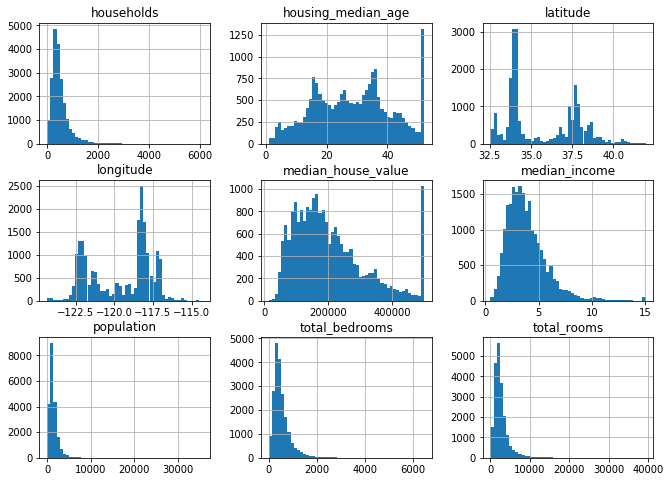

In [17]:
# Magic command for plotting graphs in jupyter-notebook
%matplotlib inline  

import matplotlib.pyplot as plt
# Make a histogram of the DataFrame
housing.hist(bins=50, figsize=(11,8))

## Manually splitting train & test dataset

In [19]:
import numpy as np
import numpy.random as rnd
# Seed the generator so as to generate same output at each run
rnd.seed(42) 

def split_train_test(data, test_ratio):
    shuffled_indices = rnd.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [20]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), len(test_set))

16512 4128


## Using Standard split function from sklearn

In [23]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


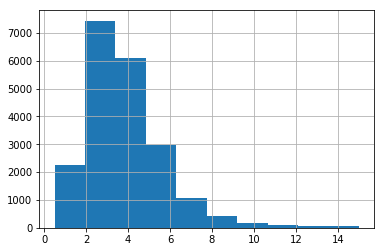

In [24]:
housing["median_income"].hist()

In [25]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYAAAAD8CAYAAAB+UHOxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAFslJREFUeJzt3XGMnPWd3/H353C4ODjFpuSmrm3VqLE4kbghsMJOU53WcWMMRDF/5BARDWvqavuHL02qrZolVesrJK1PdxwN6h2VFftiLhSf5QvCiknIymF0ilQIMRAMONQbYo7dM3Yu6zi3kEu66bd/zG+52fGuZ2b32Xlm+vu8pNU8z/f5zfN8n53d/czzzDOzigjMzCw/v1Z2A2ZmVg4HgJlZphwAZmaZcgCYmWXKAWBmlikHgJlZphwAZmaZcgCYmWXKAWBmlqklZTdwMVdeeWWsXbt2Ru3NN9/ksssuK6ehNrjPYrnPYrnPYnVbn8eOHfvriHhP04ER0bVf119/fTR68sknL6h1I/dZLPdZLPdZrG7rE/hetPA31qeAzMwy5QAwM8uUA8DMLFMOADOzTDkAzMwy5QAwM8uUA8DMLFMOADOzTDkAzMwy1dUfBdGr1g4fYWj9FNuHj3R0u6d239LR7ZlZb/MRgJlZphwAZmaZcgCYmWXKAWBmlikHgJlZphwAZmaZcgCYmWWqaQBIulrS83VfP5P0WUlXSBqRdDLdrkjjJekBSaOSXpB0Xd26BtL4k5IGFnPHzMzs4poGQES8EhHXRsS1wPXAW8CjwDBwNCLWAUfTPMBNwLr0NQg8CCDpCmAXsAG4Adg1HRpmZtZ57Z4C2gz8MCJeA7YB+1N9P3Brmt4GPJT+NeVTwHJJK4EbgZGImIiIc8AIsHXBe2BmZvPSbgDcDjySpisRcTpNvwFU0vQq4PW6+4yl2lx1MzMrgWr/QL6FgdKlwF8B74uIM5J+GhHL65afi4gVkr4O7I6I76T6UeBzQD/wzoj4Qqr/R+DnEfEHDdsZpHbqiEqlcv2BAwdm9DE5OcmyZcvmtbOdcnz8PJWlcObnnd3u+lWXt32fXvh+gvssmvssVrf1uWnTpmMR0ddsXDsfBncT8GxEnEnzZyStjIjT6RTP2VQfB9bU3W91qo1TC4H6erVxIxGxB9gD0NfXF/39/TOWV6tVGmvdZnv6MLj7jnf2s/ZO3dHf9n164fsJ7rNo7rNYvdJno3ZOAX2Svzv9A3AYmL6SZwB4rK5+Z7oaaCNwPp0qegLYImlFevF3S6qZmVkJWnqKKuky4KPAv64r7wYOStoBvAbcluqPAzcDo9SuGLoLICImJN0LPJPG3RMREwveAzMzm5eWAiAi3gT+fkPtJ9SuCmocG8DOOdazD9jXfptmZlY0vxPYzCxTDgAzs0w5AMzMMuUAMDPLlAPAzCxTDgAzs0w5AMzMMuUAMDPLlAPAzCxTDgAzs0w5AMzMMuUAMDPLlAPAzCxTDgAzs0w5AMzMMuUAMDPLlAPAzCxTDgAzs0w5AMzMMtVSAEhaLumQpB9IOiHpQ5KukDQi6WS6XZHGStIDkkYlvSDpurr1DKTxJyUNLNZOmZlZcy39U3jgS8A3I+ITki4F3gV8HjgaEbslDQPDwOeAm4B16WsD8CCwQdIVwC6gDwjgmKTDEXGu0D3K2NrhI23fZ2j9FNvncb9Gp3bfsuB1mFlnNT0CkHQ58FvAXoCI+GVE/BTYBuxPw/YDt6bpbcBDUfMUsFzSSuBGYCQiJtIf/RFga6F7Y2ZmLWvlFNBVwI+BP5H0nKQvS7oMqETE6TTmDaCSplcBr9fdfyzV5qqbmVkJWjkFtAS4Dvh0RDwt6UvUTve8LSJCUhTRkKRBYBCgUqlQrVZnLJ+cnLyg1m2G1k9RWVq77XZF9bnYj0kvPO7gPovmPhdXKwEwBoxFxNNp/hC1ADgjaWVEnE6neM6m5ePAmrr7r061caC/oV5t3FhE7AH2APT19UV/f/+M5dVqlcZat9k+fISh9VPcd7zVl1jKU1Sfp+7oX3gzF9ELjzu4z6K5z8XV9BRQRLwBvC7p6lTaDLwMHAamr+QZAB5L04eBO9PVQBuB8+lU0RPAFkkr0hVDW1LNzMxK0OpTv08DD6crgF4F7qIWHgcl7QBeA25LYx8HbgZGgbfSWCJiQtK9wDNp3D0RMVHIXpiZWdtaCoCIeJ7a5ZuNNs8yNoCdc6xnH7CvnQbNzGxx+J3AZmaZcgCYmWXKAWBmlikHgJlZphwAZmaZcgCYmWXKAWBmlikHgJlZphwAZmaZcgCYmWXKAWBmlikHgJlZphwAZmaZcgCYmWXKAWBmlikHgJlZphwAZmaZcgCYmWXKAWBmlqmWAkDSKUnHJT0v6XupdoWkEUkn0+2KVJekBySNSnpB0nV16xlI409KGlicXTIzs1a0cwSwKSKujYjpfw4/DByNiHXA0TQPcBOwLn0NAg9CLTCAXcAG4AZg13RomJlZ5y3kFNA2YH+a3g/cWld/KGqeApZLWgncCIxExEREnANGgK0L2L6ZmS1AqwEQwLckHZM0mGqViDidpt8AKml6FfB63X3HUm2uupmZlWBJi+P+WUSMS/oNYETSD+oXRkRIiiIaSgEzCFCpVKhWqzOWT05OXlDrNkPrp6gsrd12u6L6XOzHpBced3CfRXOfi6ulAIiI8XR7VtKj1M7hn5G0MiJOp1M8Z9PwcWBN3d1Xp9o40N9Qr86yrT3AHoC+vr7o7++fsbxardJY6zbbh48wtH6K+463mq/lKarPU3f0L7yZi+iFxx3cZ9Hc5+JqegpI0mWS3j09DWwBXgQOA9NX8gwAj6Xpw8Cd6WqgjcD5dKroCWCLpBXpxd8tqWZmZiVo5alfBXhU0vT4/xkR35T0DHBQ0g7gNeC2NP5x4GZgFHgLuAsgIiYk3Qs8k8bdExEThe2JmZm1pWkARMSrwAdmqf8E2DxLPYCdc6xrH7Cv/TbNzKxofiewmVmmHABmZplyAJiZZcoBYGaWKQeAmVmmHABmZplyAJiZZcoBYGaWKQeAmVmmHABmZplyAJiZZcoBYGaWKQeAmVmmHABmZplyAJiZZcoBYGaWKQeAmVmmHABmZplyAJiZZarlAJB0iaTnJH09zV8l6WlJo5L+TNKlqf7raX40LV9bt467U/0VSTcWvTNmZta6do4APgOcqJv/PeD+iHgvcA7Ykeo7gHOpfn8ah6RrgNuB9wFbgT+WdMnC2jczs/lqKQAkrQZuAb6c5gV8BDiUhuwHbk3T29I8afnmNH4bcCAifhERPwJGgRuK2AkzM2ufIqL5IOkQ8F+BdwP/DtgOPJWe5SNpDfCNiHi/pBeBrRExlpb9ENgA/G66z1dTfW+6z6GGbQ0CgwCVSuX6AwcOzOhlcnKSZcuWzXd/O+L4+HkqS+HMz8vupLmi+ly/6vKFr+QieuFxB/dZNPc5P5s2bToWEX3Nxi1pNkDSx4CzEXFMUn8RzV1MROwB9gD09fVFf//MTVarVRpr3Wb78BGG1k9x3/Gm397SFdXnqTv6F97MRfTC4w7us2juc3G18pv/YeDjkm4G3gn8PeBLwHJJSyJiClgNjKfx48AaYEzSEuBy4Cd19Wn19zEzsw5r+hpARNwdEasjYi21F3G/HRF3AE8Cn0jDBoDH0vThNE9a/u2onWc6DNyerhK6ClgHfLewPTEzs7Ys5Nj/c8ABSV8AngP2pvpe4E8ljQIT1EKDiHhJ0kHgZWAK2BkRv1rA9s3MbAHaCoCIqALVNP0qs1zFExF/C/z2HPf/IvDFdps0M7Pi+Z3AZmaZcgCYmWXKAWBmlikHgJlZphwAZmaZcgCYmWXKAWBmlikHgJlZphwAZmaZcgCYmWXKAWBmlikHgJlZphwAZmaZcgCYmWXKAWBmlikHgJlZphwAZmaZcgCYmWXKAWBmlqmmASDpnZK+K+n7kl6S9J9T/SpJT0salfRnki5N9V9P86Np+dq6dd2d6q9IunGxdsrMzJpr5QjgF8BHIuIDwLXAVkkbgd8D7o+I9wLngB1p/A7gXKrfn8Yh6RrgduB9wFbgjyVdUuTOmJlZ65oGQNRMptl3pK8APgIcSvX9wK1peluaJy3fLEmpfiAifhERPwJGgRsK2QszM2ubIqL5oNoz9WPAe4E/An4feCo9y0fSGuAbEfF+SS8CWyNiLC37IbAB+N10n6+m+t50n0MN2xoEBgEqlcr1Bw4cmNHL5OQky5Ytm/cOd8Lx8fNUlsKZn5fdSXNF9bl+1eULX8lF9MLjDu6zaO5zfjZt2nQsIvqajVvSysoi4lfAtZKWA48Cv7nA/i62rT3AHoC+vr7o7++fsbxardJY6zbbh48wtH6K+4639O0tVWF9Hn9z4eu4iKH1v+K+71y4jVO7b1nU7barF34+wX0WrVf6bNTWVUAR8VPgSeBDwHJJ0385VgPjaXocWAOQll8O/KS+Pst9zMysw1q5Cug96Zk/kpYCHwVOUAuCT6RhA8Bjafpwmict/3bUzjMdBm5PVwldBawDvlvUjpiZWXtaOfZfCexPrwP8GnAwIr4u6WXggKQvAM8Be9P4vcCfShoFJqhd+UNEvCTpIPAyMAXsTKeWzMysBE0DICJeAD44S/1VZrmKJyL+FvjtOdb1ReCL7bdpZmZF8zuBzcwy5QAwM8uUA8DMLFMOADOzTDkAzMwy5QAwM8uUA8DMLFMOADOzTDkAzMwy5QAwM8uUA8DMLFMOADOzTDkAzMwy5QAwM8uUA8DMLFPd/09rF2Dt8JGyWzAz61o+AjAzy5QDwMwsU638U/g1kp6U9LKklyR9JtWvkDQi6WS6XZHqkvSApFFJL0i6rm5dA2n8SUkDc23TzMwWXytHAFPAUERcA2wEdkq6BhgGjkbEOuBomge4CViXvgaBB6EWGMAuYAO1/yW8azo0zMys85oGQEScjohn0/TfACeAVcA2YH8ath+4NU1vAx6KmqeA5ZJWAjcCIxExERHngBFga6F7Y2ZmLWvrNQBJa4EPAk8DlYg4nRa9AVTS9Crg9bq7jaXaXHUzMytBy5eBSloG/Dnw2Yj4maS3l0VESIoiGpI0SO3UEZVKhWq1OmP55OTkBbW5DK2fKqKleaksLXf7rer1Plv9WeiUdn4+y+Q+i9UrfTZqKQAkvYPaH/+HI+JrqXxG0sqIOJ1O8ZxN9XFgTd3dV6faONDfUK82bisi9gB7APr6+qK/v3/G8mq1SmNtLttLfB/A0Pop7jve/W+z6PU+T93R3/lmLqKdn88yuc9i9UqfjVq5CkjAXuBERPxh3aLDwPSVPAPAY3X1O9PVQBuB8+lU0RPAFkkr0ou/W1LNzMxK0MpTvw8DnwKOS3o+1T4P7AYOStoBvAbclpY9DtwMjAJvAXcBRMSEpHuBZ9K4eyJiopC9MDOztjUNgIj4DqA5Fm+eZXwAO+dY1z5gXzsNmpnZ4vA7gc3MMuUAMDPLlAPAzCxTDgAzs0w5AMzMMuUAMDPLlAPAzCxTDgAzs0w5AMzMMuUAMDPLlAPAzCxTDgAzs0w5AMzMMuUAMDPLlAPAzCxTDgAzs0w5AMzMMuUAMDPLlAPAzCxTTQNA0j5JZyW9WFe7QtKIpJPpdkWqS9IDkkYlvSDpurr7DKTxJyUNLM7umJlZq1o5AvgKsLWhNgwcjYh1wNE0D3ATsC59DQIPQi0wgF3ABuAGYNd0aJiZWTmWNBsQEX8haW1DeRvQn6b3A1Xgc6n+UEQE8JSk5ZJWprEjETEBIGmEWqg8suA9sKytHT5S2rZP7b6ltG2bFWG+rwFUIuJ0mn4DqKTpVcDrdePGUm2uupmZlaTpEUAzERGSoohmACQNUjt9RKVSoVqtzlg+OTl5QW0uQ+unimqrbZWl5W6/Ve5z/mb7OWzn57NM7rNYvdJno/kGwBlJKyPidDrFczbVx4E1deNWp9o4f3fKaLpenW3FEbEH2APQ19cX/f39M5ZXq1Uaa3PZXuLpgaH1U9x3fMH5uujc5/yduqP/glo7P59lcp/F6pU+G833FNBhYPpKngHgsbr6nelqoI3A+XSq6Algi6QV6cXfLalmZmYlafqUStIj1J69XylpjNrVPLuBg5J2AK8Bt6XhjwM3A6PAW8BdABExIele4Jk07p7pF4TNzKwcrVwF9Mk5Fm2eZWwAO+dYzz5gX1vdmZnZovE7gc3MMuUAMDPLlAPAzCxTDgAzs0w5AMzMMuUAMDPLlAPAzCxTDgAzs0w5AMzMMuUAMDPLlAPAzCxT3fX5umY9ZLb/Rja0fmrRP4bc/4nMiuIjADOzTDkAzMwy5QAwM8uUA8DMLFMOADOzTDkAzMwy5ctAzXrMbJeftmu+l6v6EtT/v3T8CEDSVkmvSBqVNNzp7ZuZWU1HjwAkXQL8EfBRYAx4RtLhiHi5k32Y2fwUcfTRjukjFR95LI5OnwK6ARiNiFcBJB0AtgEOADObU6eDp12L8Q7wToRep08BrQJer5sfSzUzM+swRUTnNiZ9AtgaEf8qzX8K2BARv1M3ZhAYTLNXA680rOZK4K870O5Cuc9iuc9iuc9idVuf/ygi3tNsUKdPAY0Da+rmV6fa2yJiD7BnrhVI+l5E9C1Oe8Vxn8Vyn8Vyn8XqlT4bdfoU0DPAOklXSboUuB043OEezMyMDh8BRMSUpN8BngAuAfZFxEud7MHMzGo6/kawiHgceHwBq5jz9FCXcZ/Fcp/Fcp/F6pU+Z+joi8BmZtY9/FlAZmaZ6qkA6IWPkZC0RtKTkl6W9JKkz5Td01wkXSLpOUlfL7uXi5G0XNIhST+QdELSh8ruqZGkf5se7xclPSLpnWX3NE3SPklnJb1YV7tC0oikk+l2RZk9pp5m6/P30+P+gqRHJS0vs8fU0wV91i0bkhSSriyjt3b1TADUfYzETcA1wCclXVNuV7OaAoYi4hpgI7CzS/sE+AxwouwmWvAl4JsR8ZvAB+iyniWtAv4N0BcR76d2gcPt5XY1w1eArQ21YeBoRKwDjqb5sn2FC/scAd4fEf8E+N/A3Z1uahZf4cI+kbQG2AL8Zacbmq+eCQDqPkYiIn4JTH+MRFeJiNMR8Wya/htqf6y67t3OklYDtwBfLruXi5F0OfBbwF6AiPhlRPy03K5mtQRYKmkJ8C7gr0ru520R8RfAREN5G7A/Te8Hbu1oU7OYrc+I+FZETKXZp6i9d6hUc3w/Ae4H/j3QMy+s9lIA9NzHSEhaC3wQeLrcTmb136j9sP7fshtp4irgx8CfpNNVX5Z0WdlN1YuIceAPqD3zOw2cj4hvldtVU5WIOJ2m3wAqZTbTon8JfKPsJmYjaRswHhHfL7uXdvRSAPQUScuAPwc+GxE/K7ufepI+BpyNiGNl99KCJcB1wIMR8UHgTbrjdMXb0vnzbdTC6h8Cl0n6F+V21bqoXQrY1c9aJf0HaqdXHy67l0aS3gV8HvhPZffSrl4KgKYfI9EtJL2D2h//hyPia2X3M4sPAx+XdIraqbSPSPpquS3NaQwYi4jpo6hD1AKhm/xz4EcR8eOI+D/A14B/WnJPzZyRtBIg3Z4tuZ85SdoOfAy4I7rzuvV/TC38v59+p1YDz0r6B6V21YJeCoCe+BgJSaJ2vvpERPxh2f3MJiLujojVEbGW2vfx2xHRlc9YI+IN4HVJV6fSZrrv48P/Etgo6V3p8d9Ml71QPYvDwECaHgAeK7GXOUnaSu1U5ccj4q2y+5lNRByPiN+IiLXpd2oMuC797Ha1ngmA9ELQ9MdInAAOdunHSHwY+BS1Z9XPp6+by26qx30aeFjSC8C1wH8puZ8Z0tHJIeBZ4Di136uueWeopEeA/wVcLWlM0g5gN/BRSSepHcHsLrNHmLPP/w68GxhJv0v/o9QmmbPPnuR3ApuZZapnjgDMzKxYDgAzs0w5AMzMMuUAMDPLlAPAzCxTDgAzs0w5AMzMMuUAMDPL1P8DDz1jaVZL9tEAAAAASUVORK5CYII=housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

## Using `StratifiedShuffleSplit` to Split training and test dataset

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [27]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [28]:
# Comparing the difference of output of the two splitting functions
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [29]:
for set in (strat_train_set, strat_test_set):
    set.drop("income_cat", axis=1, inplace=True)

### Discover and visualize the data to gain insights

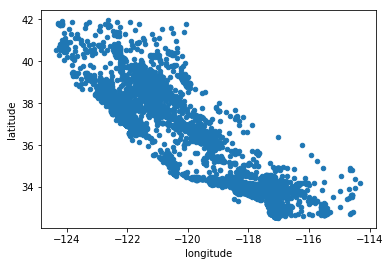

In [36]:
# Creating a copy of training set
housing = strat_train_set.copy()

# Bad visualization plot
housing.plot(kind="scatter", x="longitude", y="latitude")

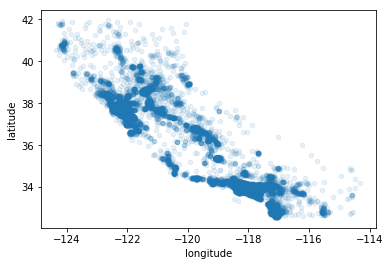

In [37]:
# Better visualization plot
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

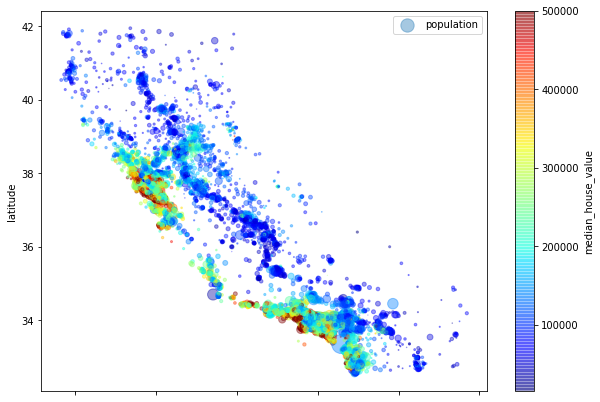

In [38]:
# Housing prices scatterplot

housing.plot(kind="scatter", x="longitude", y="latitude",
    s=housing['population']/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()

## Determining correlation between attributes

In [41]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

[0, 16, 0, 550000]

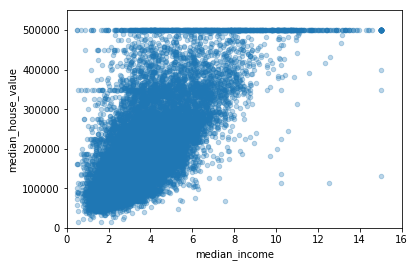

In [42]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.3)
plt.axis([0, 16, 0, 550000])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8b2d74eb8>,
      dtype=object)

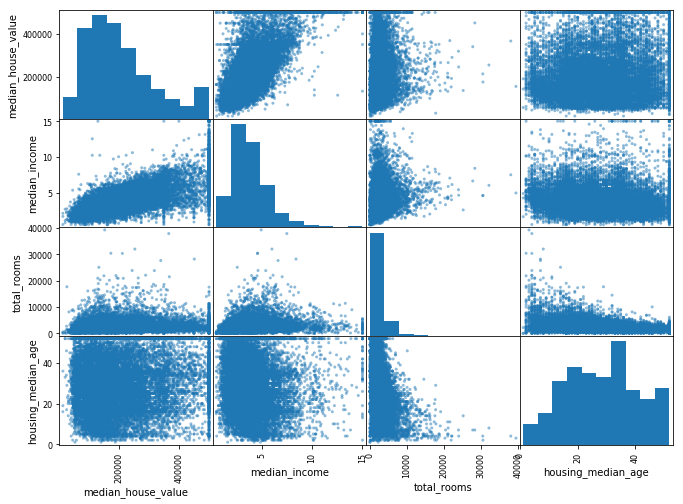

In [46]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(11, 8))

In [47]:
# Adding features / attributes
housing["rooms_per_household"] = housing["total_rooms"] / housing["population"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [48]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.199429
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

[0, 5, 0, 520000]

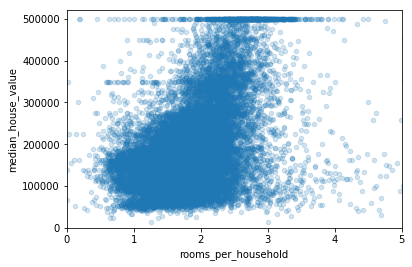

In [49]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])

In [50]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,1.982840,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,1.214607,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.002547,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,1.521534,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,1.937963,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,2.297169,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,55.222222,1.000000,1243.333333


## Prepare the data for Machine Learning algorithm

In [51]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [52]:
housing_copy = housing.copy().iloc[21:24]
housing_copy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,<1H OCEAN
16718,-120.66,35.49,17.0,4422.0,945.0,2307.0,885.0,2.8285,<1H OCEAN
13600,-117.25,34.16,37.0,1709.0,278.0,744.0,274.0,3.7188,INLAND


In [53]:
housing_copy.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,<1H OCEAN
16718,-120.66,35.49,17.0,4422.0,945.0,2307.0,885.0,2.8285,<1H OCEAN
13600,-117.25,34.16,37.0,1709.0,278.0,744.0,274.0,3.7188,INLAND


In [54]:
housing_copy = housing.copy().iloc[21:24]
housing_copy.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
18086,-122.05,37.31,25.0,4111.0,1585.0,568.0,9.2298,<1H OCEAN
16718,-120.66,35.49,17.0,4422.0,2307.0,885.0,2.8285,<1H OCEAN
13600,-117.25,34.16,37.0,1709.0,744.0,274.0,3.7188,INLAND


In [55]:
housing_copy = housing.copy().iloc[21:24]
median = housing_copy["total_bedrooms"].median()
housing_copy["total_bedrooms"].fillna(median, inplace=True) # option 3
housing_copy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,<1H OCEAN
16718,-120.66,35.49,17.0,4422.0,945.0,2307.0,885.0,2.8285,<1H OCEAN
13600,-117.25,34.16,37.0,1709.0,278.0,744.0,274.0,3.7188,INLAND


In [61]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.iloc[21:24]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
21,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298
22,-120.66,35.49,17.0,4422.0,945.0,2307.0,885.0,2.8285
23,-117.25,34.16,37.0,1709.0,278.0,744.0,274.0,3.7188


In [62]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [63]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [64]:
imputer.strategy

'median'

In [65]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [66]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [67]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [69]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [70]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [71]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
encoder.fit_transform(housing_cat)

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [72]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

num_pipeline.fit_transform(housing_num)

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [84]:
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [85]:
from sklearn.pipeline import FeatureUnion

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', MyLabelBinarizer()),
    ])

preparation_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [86]:
housing_prepared = preparation_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [87]:
housing_prepared.shape

(16512, 16)

## Prepare the data for Machine Learning algorithms

In [88]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
# let's try the full pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = preparation_pipeline.transform(some_data)

print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [90]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [91]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

In [93]:
from sklearn.tree import DecisionTreeRegressor
# -/ Overfitting -/
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Fine-tune our model

In [94]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                              scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [95]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Scores: [69118.03785073 65692.08044611 70391.76172676 68452.35780065
 70150.3900922  74928.50060041 72036.30513386 71394.47039561
 75498.39566637 70160.54665556]
Mean: 70782.28463682547
Standard deviation: 2764.542656140108


In [96]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798348


In [97]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/home/o_o/miniconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


22241.969538806814

In [98]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [52189.88653784 48833.95711594 51517.94679957 54451.50951239
 51041.25018178 55591.70530493 51978.02566121 50807.30081415
 54644.79362853 53092.03881823]
Mean: 52414.8414374574
Standard deviation: 1949.6478908995434


In [99]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69052.461363
std       2879.437224
min      64969.630564
25%      67136.363758
50%      68156.372635
75%      70982.369487
max      74739.570526
dtype: float64

In [100]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

In [101]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [102]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [103]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [104]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65366.91543371907 {'max_features': 2, 'n_estimators': 3}
55375.44346258039 {'max_features': 2, 'n_estimators': 10}
52994.65863895376 {'max_features': 2, 'n_estimators': 30}
59640.455576975626 {'max_features': 4, 'n_estimators': 3}
52754.94276951631 {'max_features': 4, 'n_estimators': 10}
50529.32734483642 {'max_features': 4, 'n_estimators': 30}
59168.11978212172 {'max_features': 6, 'n_estimators': 3}
52325.01727770549 {'max_features': 6, 'n_estimators': 10}
49952.89033456243 {'max_features': 6, 'n_estimators': 30}
59119.6530540572 {'max_features': 8, 'n_estimators': 3}
52394.711767363064 {'max_features': 8, 'n_estimators': 10}
50008.76431739389 {'max_features': 8, 'n_estimators': 30}
62262.738251837574 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54571.74836608283 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59869.44811624182 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52321.20130702979 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [105]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.055448,0.002561,0.002857,0.000048,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.242513e+09,-4.201845e+09,-4.141469e+09,-4.316161e+09,-4.462211e+09,-4.272834e+09,1.104088e+08,18
1,0.192105,0.004314,0.008178,0.000142,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.915201e+09,-3.203367e+09,-3.090124e+09,-2.999763e+09,-3.123747e+09,-3.066440e+09,9.991971e+07,11
2,0.583859,0.007271,0.022640,0.000290,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.667183e+09,-2.929651e+09,-2.896806e+09,-2.637743e+09,-2.910792e+09,-2.808434e+09,1.281155e+08,9
3,0.098385,0.002616,0.003031,0.000049,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.477334e+09,-3.639453e+09,-3.784042e+09,-3.273280e+09,-3.610810e+09,-3.556984e+09,1.720885e+08,15
4,0.325448,0.004677,0.008423,0.000384,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.723120e+09,-2.804743e+09,-2.826158e+09,-2.668375e+09,-2.893036e+09,-2.783084e+09,7.894973e+07,8
5,0.993191,0.014303,0.023040,0.000409,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.300485e+09,-2.635040e+09,-2.687287e+09,-2.493936e+09,-2.649368e+09,-2.553213e+09,1.423456e+08,3
6,0.139499,0.004541,0.003195,0.000152,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.217428e+09,-3.729508e+09,-3.442149e+09,-3.288108e+09,-3.827155e+09,-3.500866e+09,2.399158e+08,14
7,0.458062,0.004902,0.008234,0.000080,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.653571e+09,-2.723001e+09,-2.892926e+09,-2.622833e+09,-2.797236e+09,-2.737907e+09,9.810607e+07,6
8,1.392917,0.017620,0.023361,0.000217,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.406114e+09,-2.534184e+09,-2.632008e+09,-2.285664e+09,-2.618501e+09,-2.495291e+09,1.321159e+08,1
9,0.182897,0.001676,0.003138,0.000011,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.314020e+09,-3.803397e+09,-3.516013e+09,-3.399512e+09,-3.442687e+09,-3.495133e+09,1.674399e+08,12


In [106]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor()
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error')
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [107]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

54627.56478454076 {'max_features': 1, 'n_estimators': 96}
59206.09947408663 {'max_features': 5, 'n_estimators': 3}
66089.44696042346 {'max_features': 3, 'n_estimators': 2}
49072.22835186092 {'max_features': 7, 'n_estimators': 190}
50653.90277561901 {'max_features': 3, 'n_estimators': 49}
49228.467055214365 {'max_features': 5, 'n_estimators': 148}
49376.90649901092 {'max_features': 5, 'n_estimators': 145}
52020.4652176653 {'max_features': 2, 'n_estimators': 105}
53507.69780469315 {'max_features': 6, 'n_estimators': 6}
50059.73337398731 {'max_features': 6, 'n_estimators': 31}


In [108]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.53872624e-02, 7.03263330e-02, 4.35861309e-02, 1.79275243e-02,
       1.64292728e-02, 1.80710136e-02, 1.58818596e-02, 3.23621728e-01,
       5.54898373e-02, 1.05368930e-01, 9.27791835e-02, 9.92291864e-03,
       1.45180221e-01, 8.97144628e-05, 3.80775600e-03, 6.13031472e-03])

In [109]:
extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3236217279074228, 'median_income'),
 (0.14518022101647327, 'INLAND'),
 (0.10536892990642237, 'population_per_household'),
 (0.09277918347278008, 'bedrooms_per_room'),
 (0.07538726238225427, 'longitude'),
 (0.07032633302444541, 'latitude'),
 (0.05548983727425136, 'rooms_per_household'),
 (0.04358613092880469, 'housing_median_age'),
 (0.018071013550087715, 'population'),
 (0.01792752429325205, 'total_rooms'),
 (0.016429272821826678, 'total_bedrooms'),
 (0.015881859590129697, 'households'),
 (0.0099229186417411, '<1H OCEAN'),
 (0.006130314722709948, 'NEAR OCEAN'),
 (0.0038077560045742024, 'NEAR BAY'),
 (8.971446282451949e-05, 'ISLAND')]

In [110]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_transformed = preparation_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_transformed)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47713.91618363488